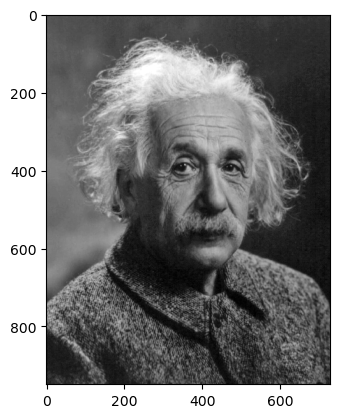

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

grey = r'albert-einstein_gray.jpg'
colour = r'tulips.jpg'

I_grey = cv2.imread(grey, cv2.IMREAD_GRAYSCALE)
I_BGR = cv2.imread(colour)

plt.imshow(I_grey, cmap = 'gray')

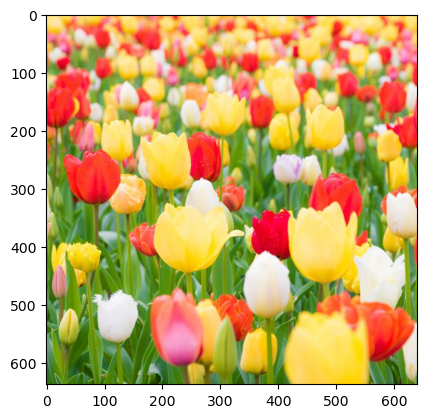

In [7]:
plt.imshow(I_BGR[:,:,::-1])

# stretching grey image horizontally and vertically

([], [])

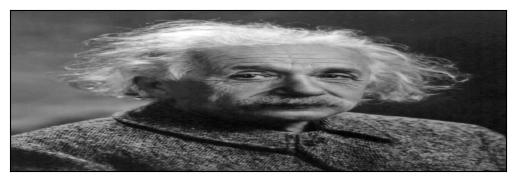

In [12]:
I_grey_resized = cv2.resize(src=I_grey, fx = 2, fy = 0.5, dsize = None) # resizing with source image, scaling x by 2 and y by 0.5.
plt.imshow(I_grey_resized, cmap = 'gray')
plt.xticks([])
plt.yticks([])

In [14]:
I_grey_resized.shape

(474, 1456)

In [16]:
I_grey.shape

(949, 728)

In [ ]:
# can see that x has doubled and y has halved

([], [])

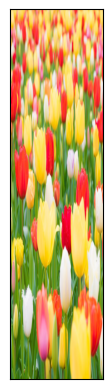

In [20]:
I_BGR_resized = cv2.resize(src = I_BGR, fx = 0.5, fy = 2, dsize = None)
plt.imshow(I_BGR_resized[:,:,::-1])
plt.xticks([])
plt.yticks([])

# challenge: zoom into image to 2x using openCV

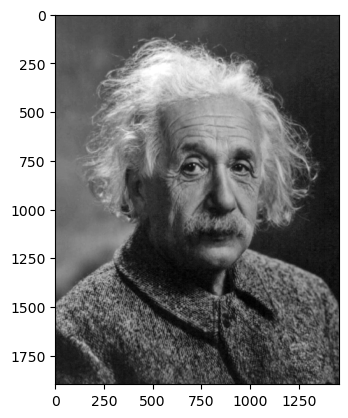

In [25]:
I_grey_zoom = cv2.resize(src = I_grey, fx = 2, fy = 2, dsize = None)
plt.imshow(I_grey_zoom, cmap = 'gray')

# Matrix multiplication

In [36]:
p = np.array([2,4]) # point
Sx, Sy = 2, 2 # scaling factors
S = np.array([[Sx,0],
              [0,Sy]]) # transformation matrix
S

array([[2, 0],
       [0, 2]])

In [38]:
p_dash = S.dot(p) # multiply matrix on the right (scalar dot mult)
p_dash

array([4, 8])

# challenge: calculate dot product of a 3d point in python

In [47]:
x = np.array([2,4,6])
Sx, Sy, Sz = 2, 2, 2
A = np.array([[Sx,0,0],[0,Sy,0],[0,0,Sz]])
A

array([[2, 0, 0],
       [0, 2, 0],
       [0, 0, 2]])

In [49]:
x_dash = A.dot(x)
x_dash

array([ 4,  8, 12])

# Image copy and flipping vertically

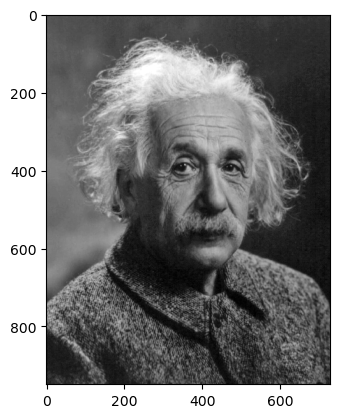

In [52]:
plt.imshow(I_grey, cmap = 'gray')

In [56]:
numRows = I_grey.shape[0]
numCols = I_grey.shape[1]
print(numRows, numCols)

949 728


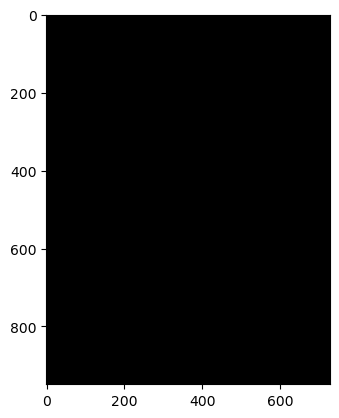

In [58]:
I_grey2 = np.zeros((numRows, numCols), dtype = 'uint8')
plt.imshow(I_grey2, cmap = 'gray')
# making a blank square

In [64]:
for i in range(numRows):
  for j in range(numCols):
      I_grey2[i,j] = I_grey[i,j]
# copying pixels

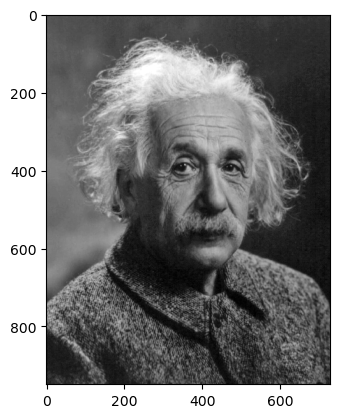

In [62]:
plt.imshow(I_grey2, cmap = 'gray')

In [68]:
# flipping image
for i in range(numRows):
  for j in range(numCols):
      I_grey2[numRows-i-1,j] = I_grey[i,j] # flipping row

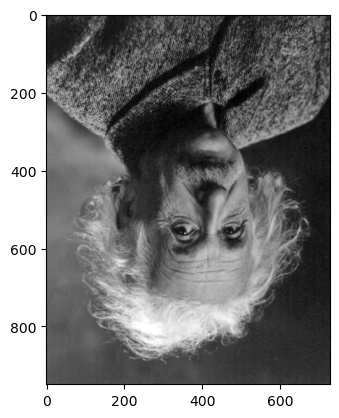

In [70]:
plt.imshow(I_grey2, cmap = 'gray')

# Challenge: crop image in half using python

In [110]:
I_grey3 = np.zeros((int(numRows/2), numCols), dtype = 'uint8')
for i in range(int(numRows/2)):
  for j in range(numCols):
      I_grey3[i,j] = I_grey[i,j]

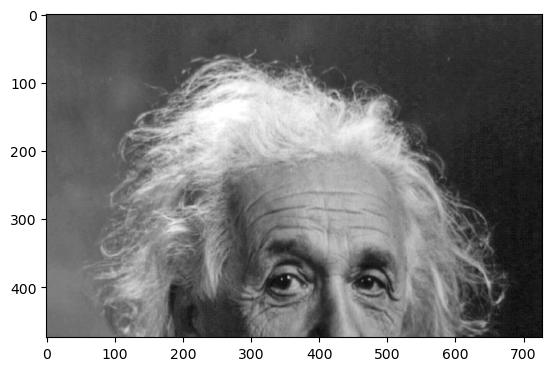

In [112]:
plt.imshow(I_grey3, cmap = 'gray')

# Challenge: Flip image horizontally

In [115]:
for i in range(numRows):
  for j in range(numCols):
      I_grey2[i,numCols-j-1] = I_grey[i,j]

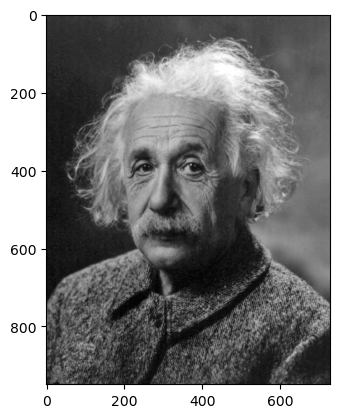

In [117]:
plt.imshow(I_grey2, cmap = 'gray')

# impact of holes
## double image in both directions but you will see holes

In [123]:
S = np.array([[2,0],[0,2]]) # scaling matrix
I2 = np.zeros((2*numRows,2*numCols), dtype = 'uint8')
for i in range(numRows):
    for j in range(numCols):
        p = np.array([i,j])
        p_dash = S.dot(p)
        new_i, new_j = p_dash[0], p_dash[1]
        I2[new_i,new_j] = I_grey[i,j]

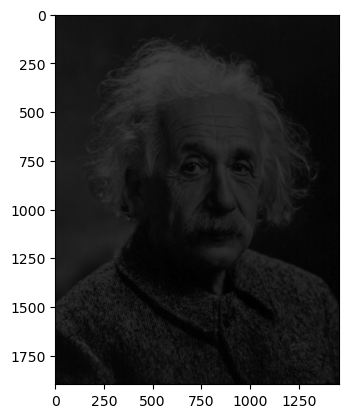

In [125]:
plt.imshow(I2, cmap = 'gray')

In [131]:
# displaying image in its actual size
import matplotlib as mpl
def displayImageInActualSize(I):
    dpi = mpl.rcParams['figure.dpi']
    H,W = I.shape
    figSize = W/float(dpi), H/float(dpi)
    fig = plt.figure(figsize = figSize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(I, cmap = 'gray')
    plt.show

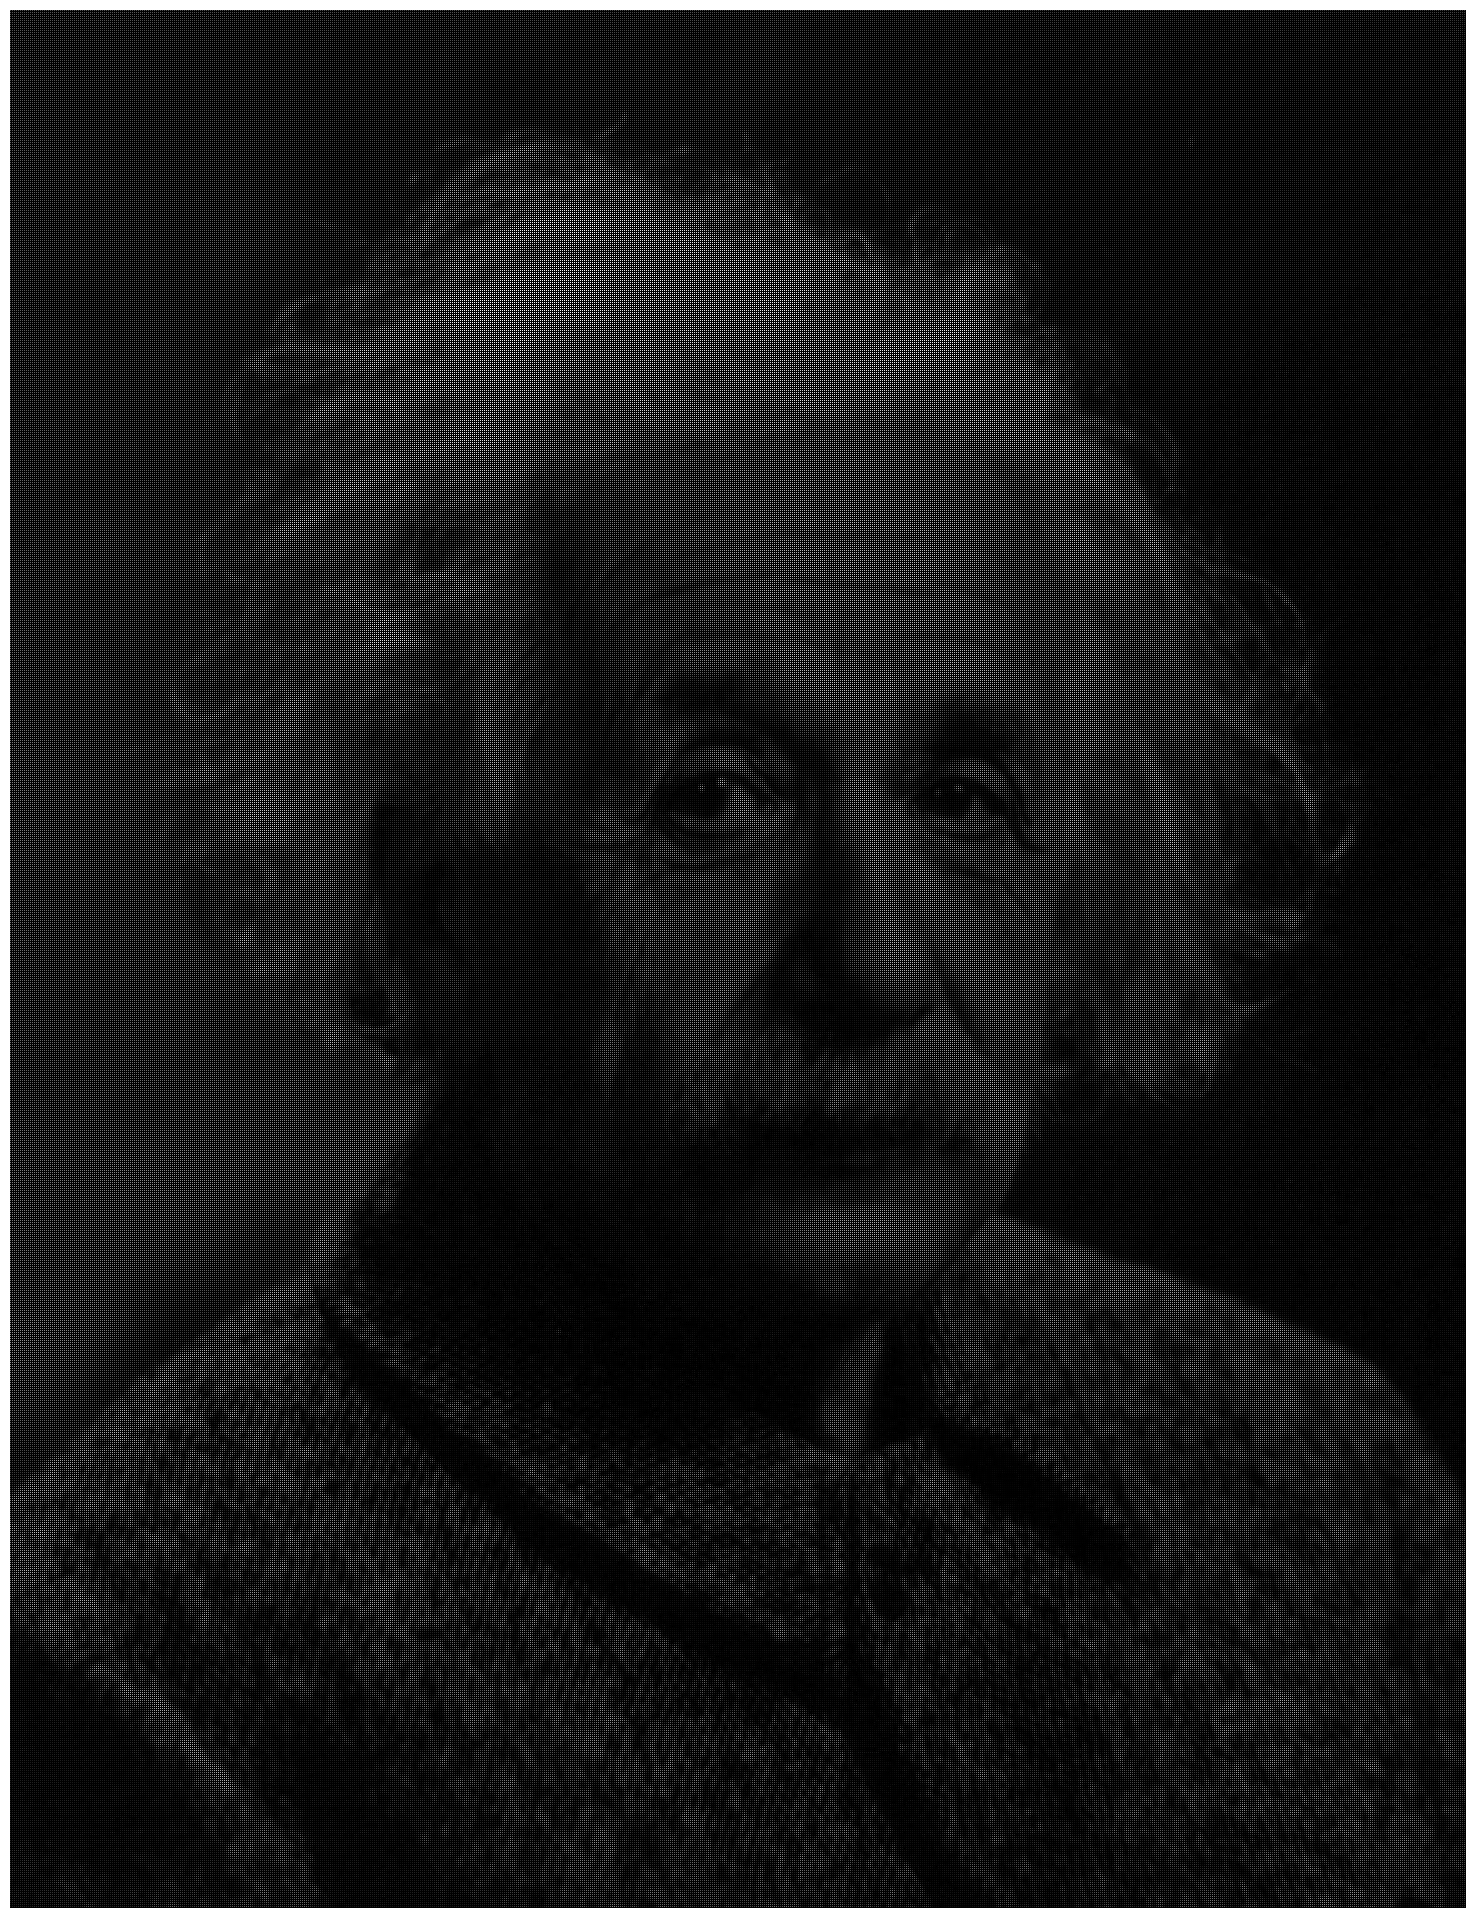

In [129]:
displayImageInActualSize(I2)

In [ ]:
# can now see the holes

# Inverse Scaling

In [156]:
S = np.array([[2,0],[0,2]])
I2 = np.zeros((2*numRows,2*numCols), dtype = 'uint8')
Tinv = np.linalg.inv(S)
for new_i in range(I2.shape[0]):
    for new_j in range(I2.shape[1]):
        p_dash = np.array([new_i,new_j])
        p = Tinv.dot(p_dash)
        p = np.int16(np.floor(p))
        i, j = p[0], p[1]
        I2[new_i,new_j] = I_grey[i,j]

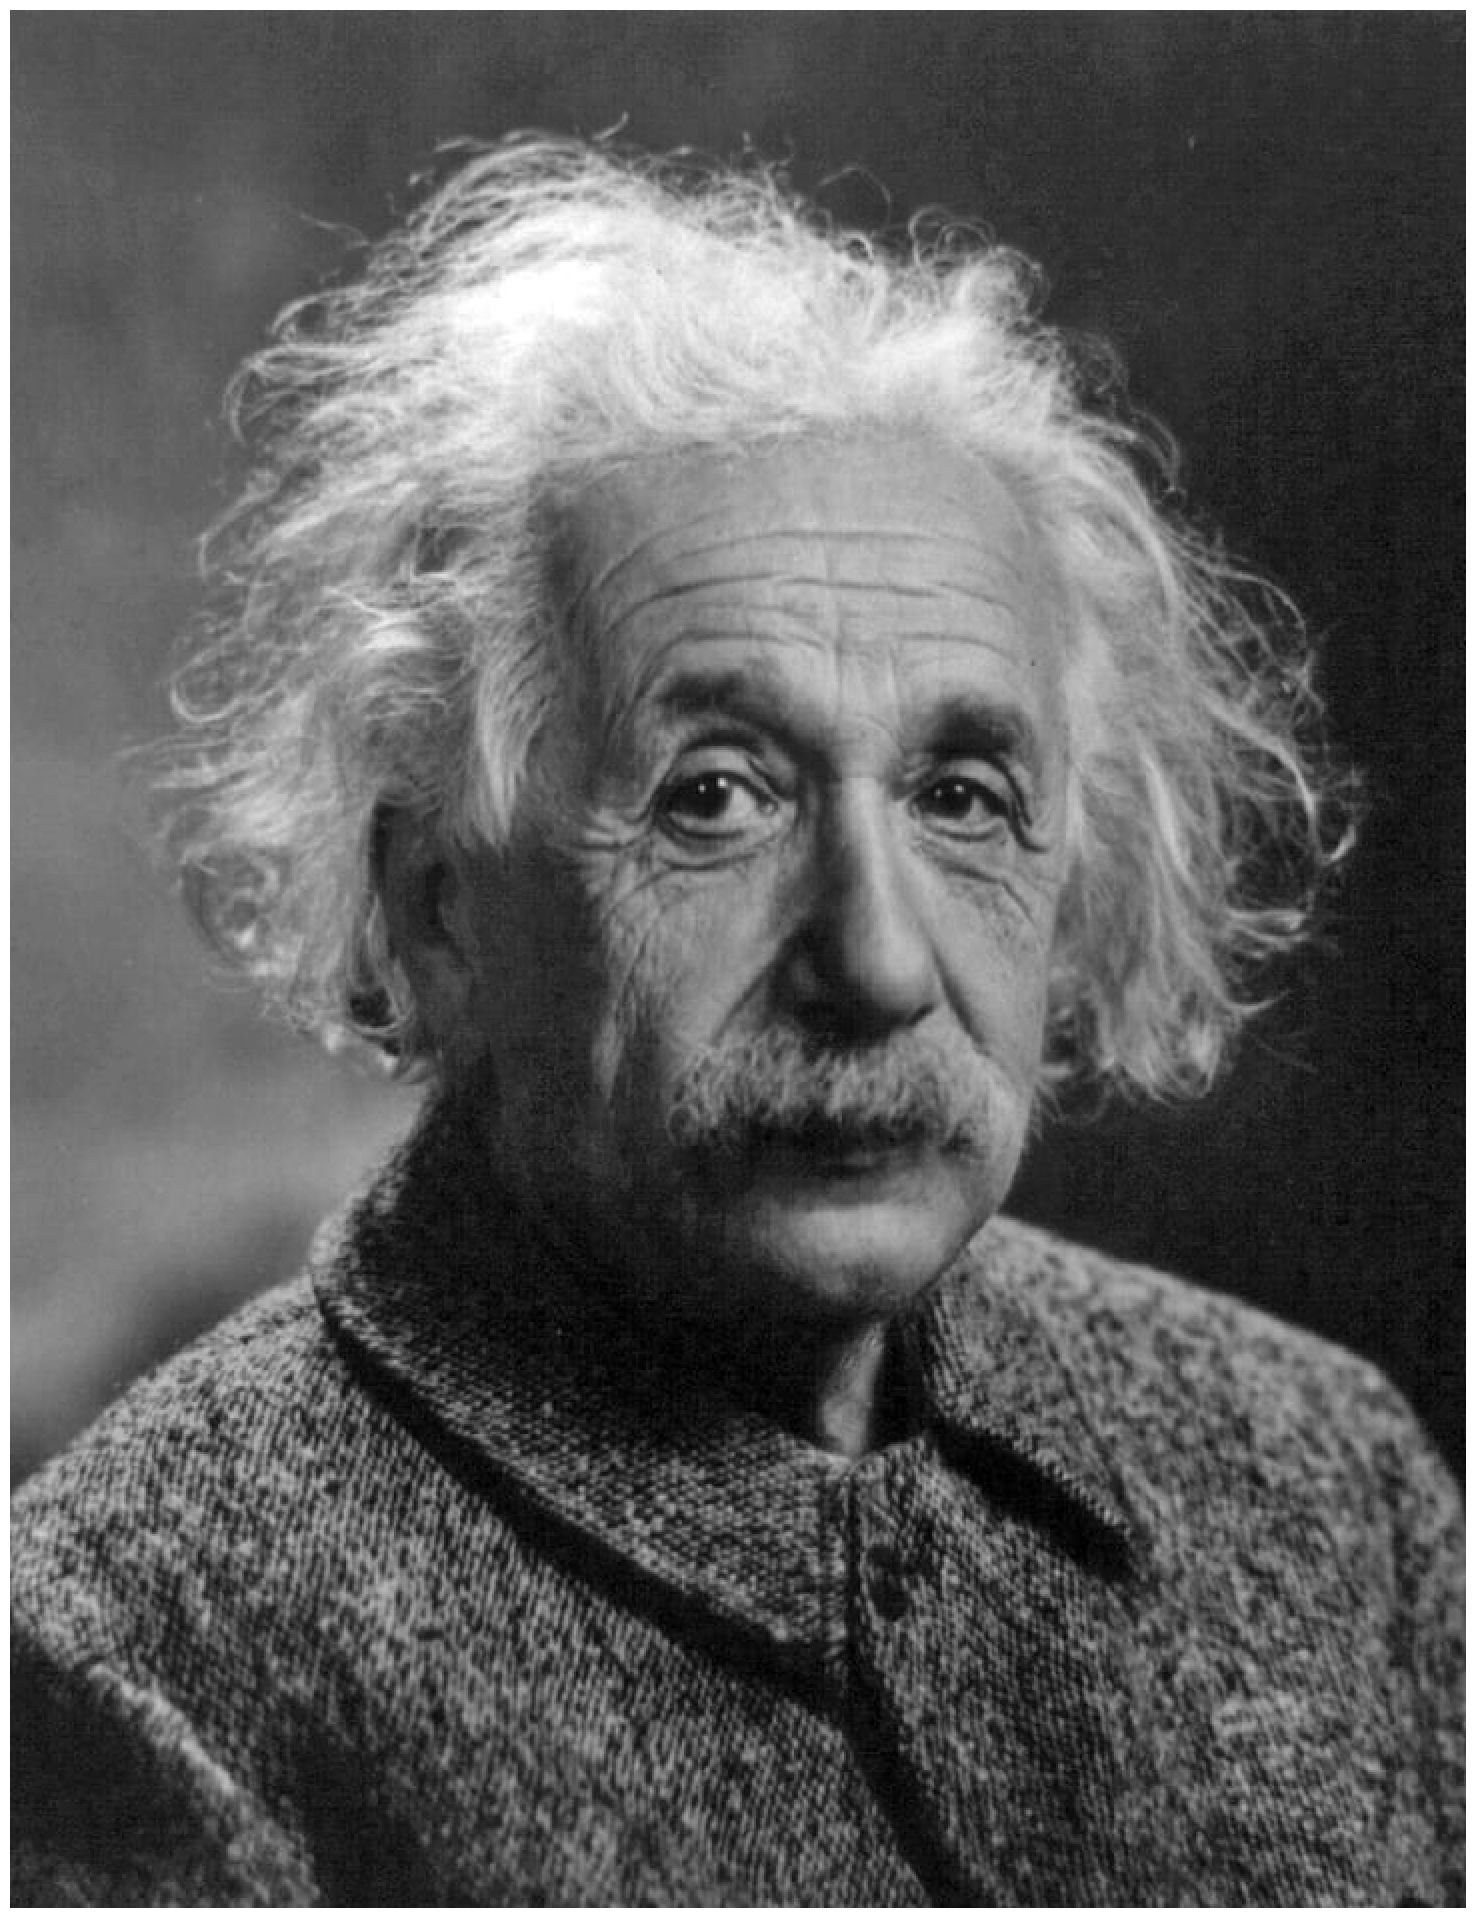

In [157]:
displayImageInActualSize(I2)

##### inverse transform image is brighter than the one with holes because we filled our array with zeros, which represents black. So when there is a hole you get black.
##### to brighten, fill array with 255s

In [243]:
S = np.array([[2,0],[0,2]]) # scaling matrix
I4 = np.ones((2*numRows,2*numCols), dtype = 'uint8')*255
for i in range(numRows):
    for j in range(numCols):
        p = np.array([i,j])
        p_dash = S.dot(p)
        new_i, new_j = p_dash[0], p_dash[1]
        I4[new_i,new_j] = I_grey[i,j]
        

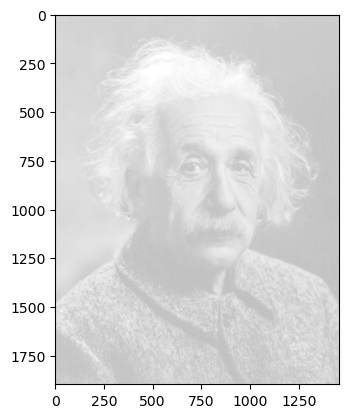

In [244]:
plt.imshow(I4, cmap = 'gray')

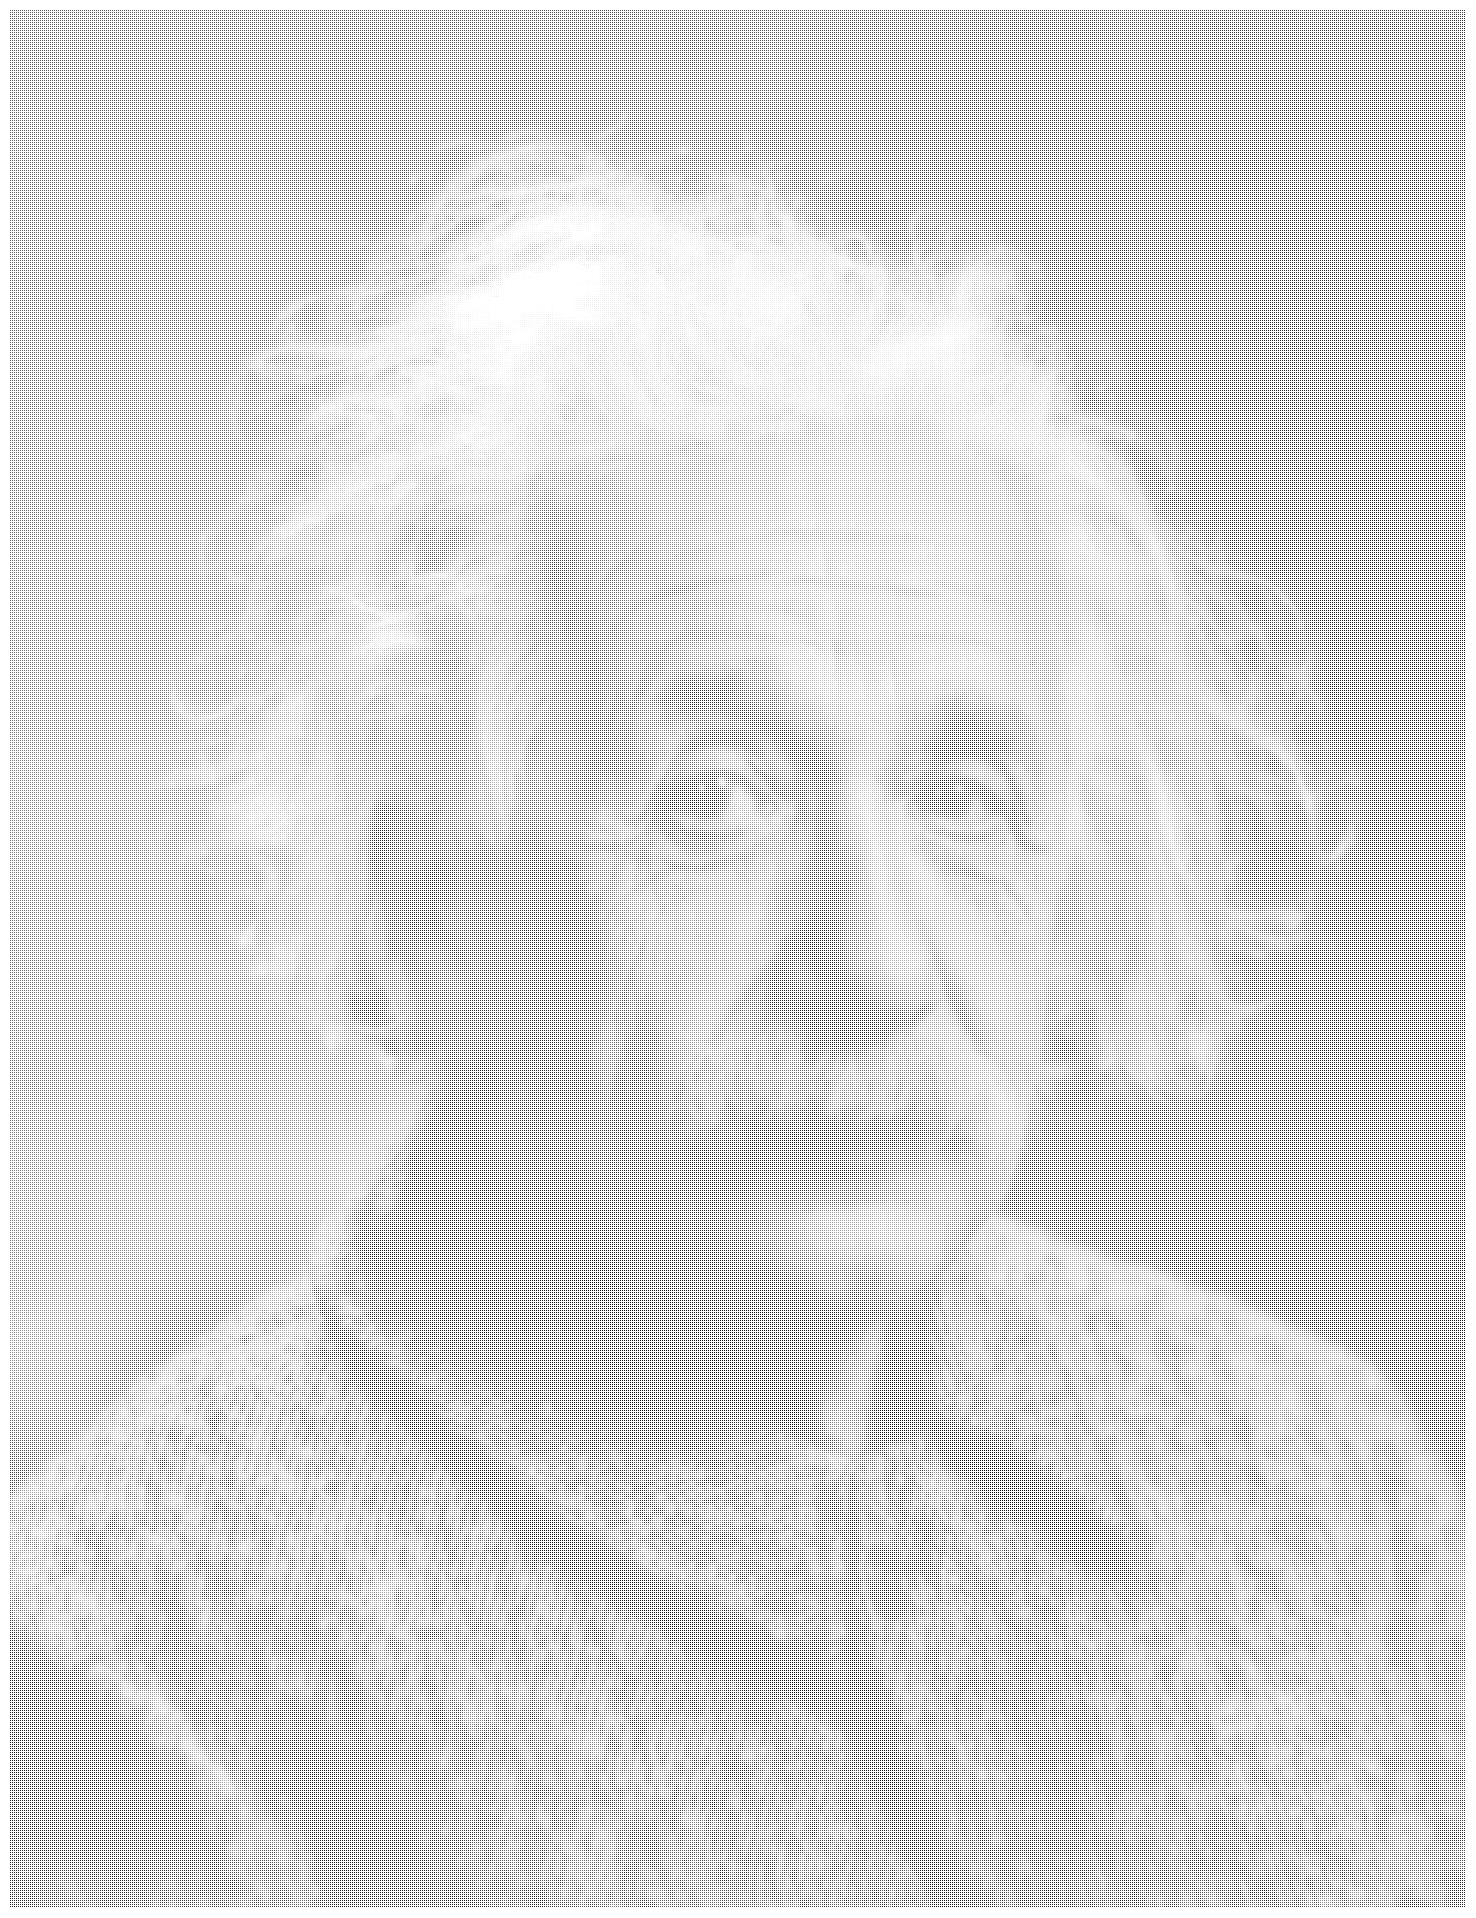

In [189]:
displayImageInActualSize(I4)

In [160]:
# Inverse transformation
Tinv = np.linalg.inv(S)
Tinv

array([[0.5, 0. ],
       [0. , 0.5]])

# difference between floor, ceil and round

In [169]:
np.ceil(2.3) # always rounds up

3.0

In [171]:
np.floor(2.3) # always rounds down

2.0

In [173]:
np.round(2.3) # rounds as you'd expect it to

2.0

In [177]:
np.round(2.6)

3.0

# Rounding function instead of flooring

In [193]:
S = np.array([[2,0],[0,2]])
I2 = np.zeros((2*numRows,2*numCols), dtype = 'uint8')
Tinv = np.linalg.inv(S)
for new_i in range(I2.shape[0]):
    for new_j in range(I2.shape[1]):
        p_dash = np.array([new_i,new_j])
        p = Tinv.dot(p_dash)
        p = np.int16(np.round(p))
        i, j = p[0], p[1]
        if i < 0 or i >= numRows or j < 0 or j >= numCols:
            pass
        else:
            I2[new_i,new_j] = I_grey[i,j]

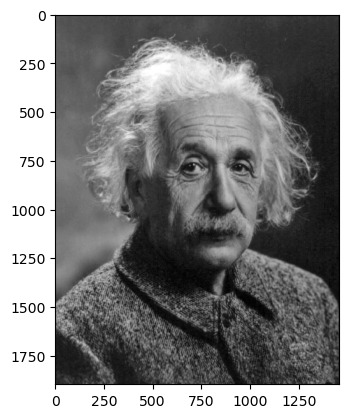

In [197]:
plt.imshow(I2, cmap = 'gray')

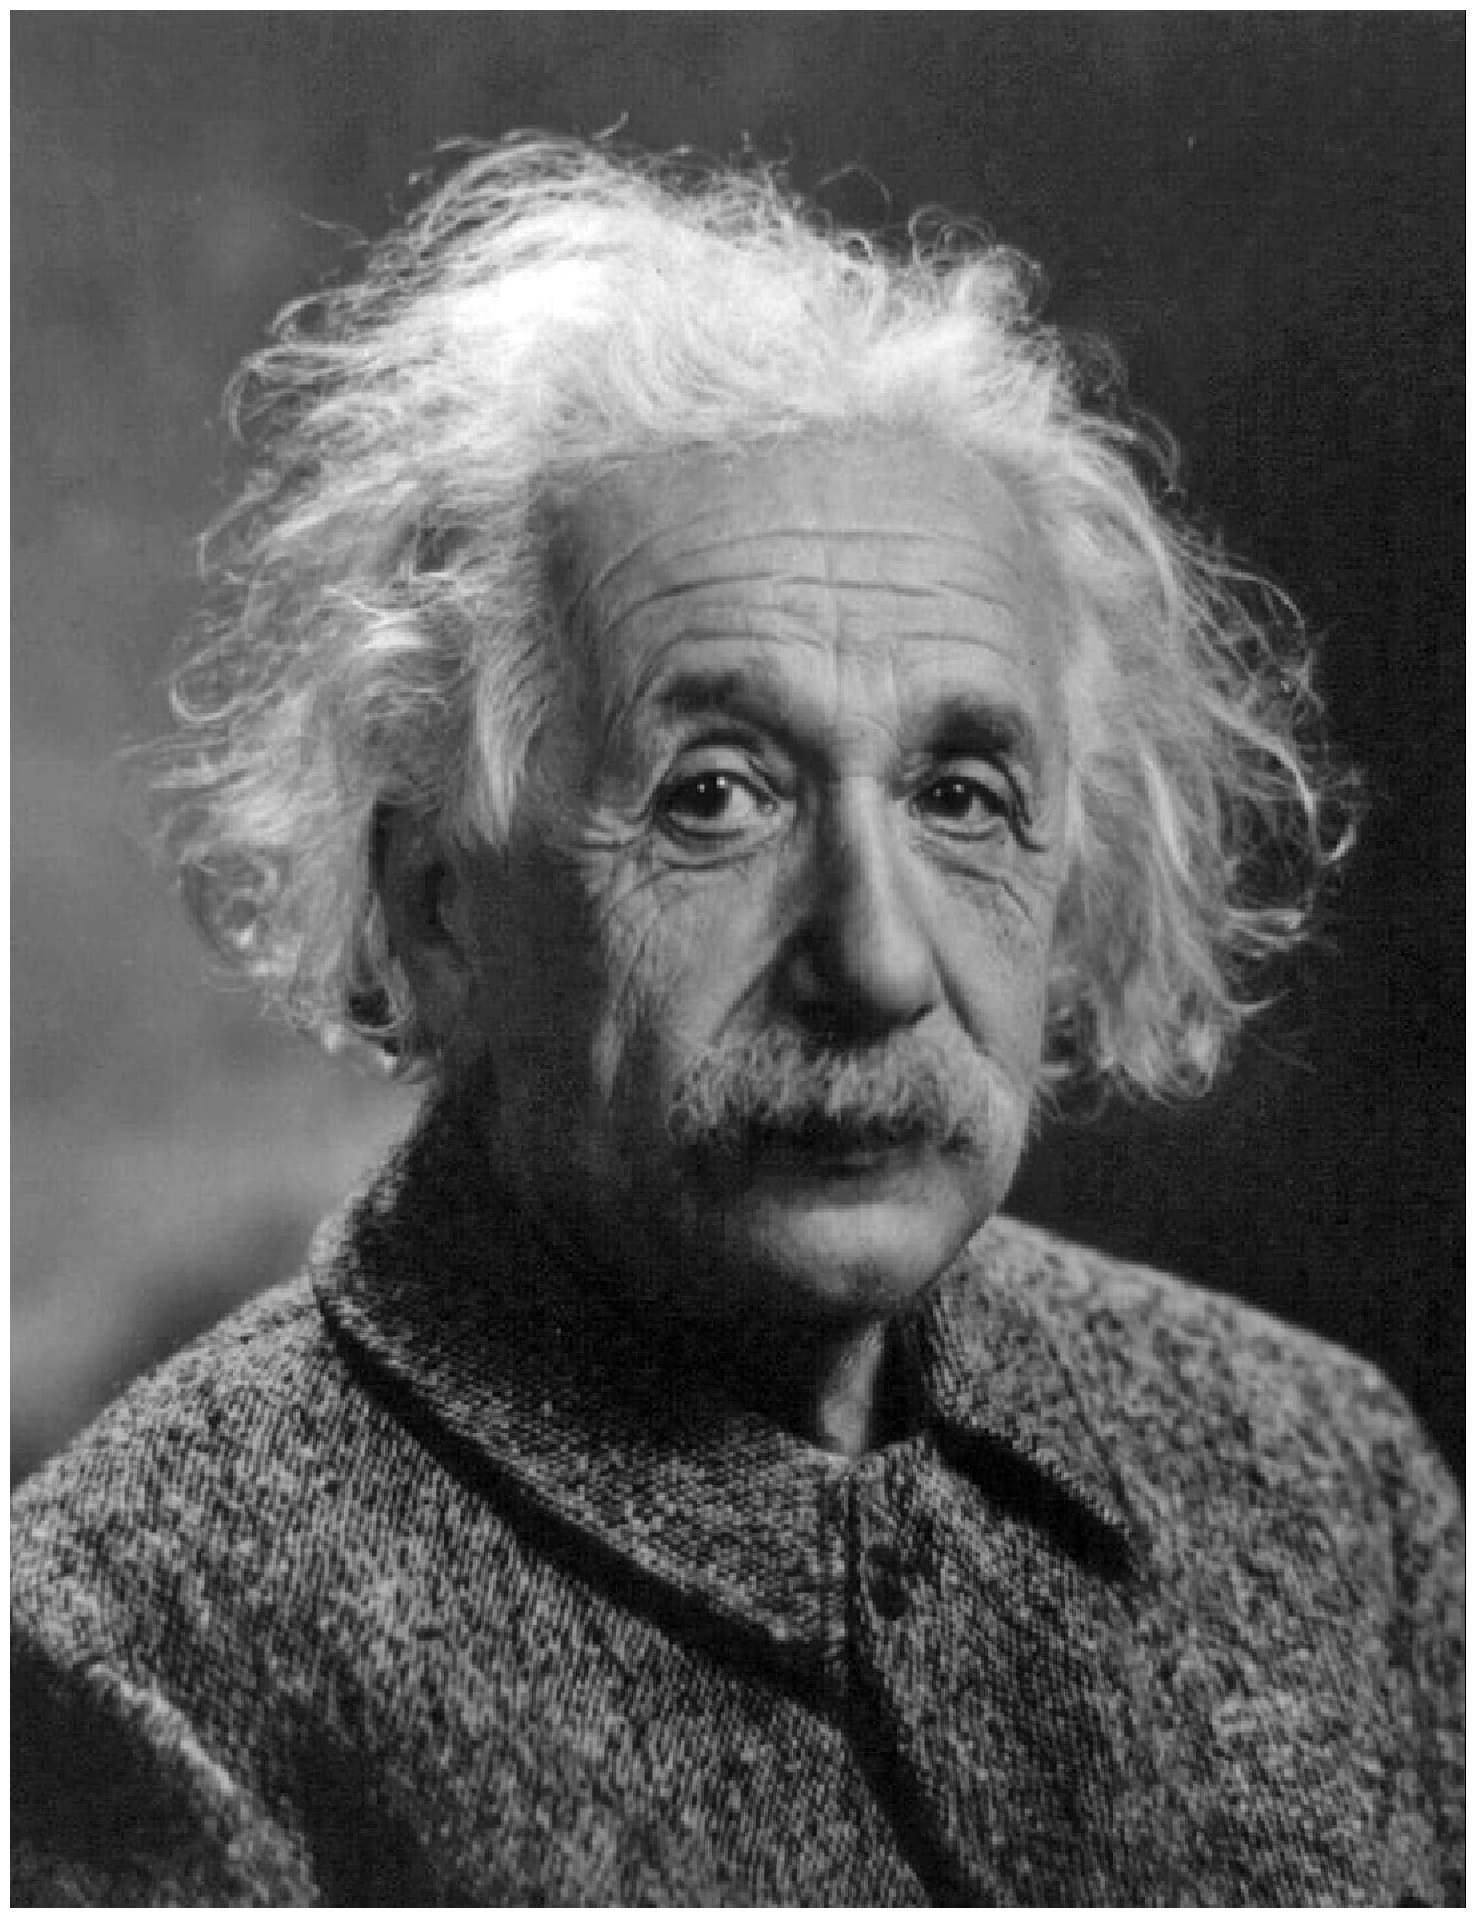

In [194]:
displayImageInActualSize(I2)

# Bilinear Interpolation

In [214]:
def f_bilinearInterpolate(r,c,I):  # function which takes row, colum and source image
    lc = int(c)   # left colum from point, int rounds down to left
    rc = lc + 1   # right colum from point
    wr = c - lc   # weighting for the right colum
    wl = rc - c
    tr = int(r)   # top row
    br = tr + 1   # bottom row
    wt = br - r
    wb = r - tr
    if tr >= 0 and br < I.shape[0] and lc >=0 and rc < I.shape[1]:
        a = wl*I[tr,lc] + wr*I[tr,rc] # intensity of interpolated top row
        b = wl*I[br,lc] + wr*I[br,rc] # intensity of interpolated bottom row
        g = wt*a + wb*b   # intensity of the second interpolation
        return np.uint8(g)
    else: 
        return 0

In [235]:
S = np.array([[2,0],[0,2]])
I3 = np.zeros((2*numRows,2*numCols), dtype = 'uint8')
Tinv = np.linalg.inv(S)
for new_i in range(I3.shape[0]):
    for new_j in range(I3.shape[1]):
        p_dash = np.array([new_i,new_j])
        p = Tinv.dot(p_dash)
        # p = np.int16(np.round(p))
        i, j = p[0], p[1]
        if i < 0 or i >= numRows or j < 0 or j >= numCols:
            pass
        else:
            g = f_bilinearInterpolate(i,j,I_grey)
            I3[new_i,new_j] = g

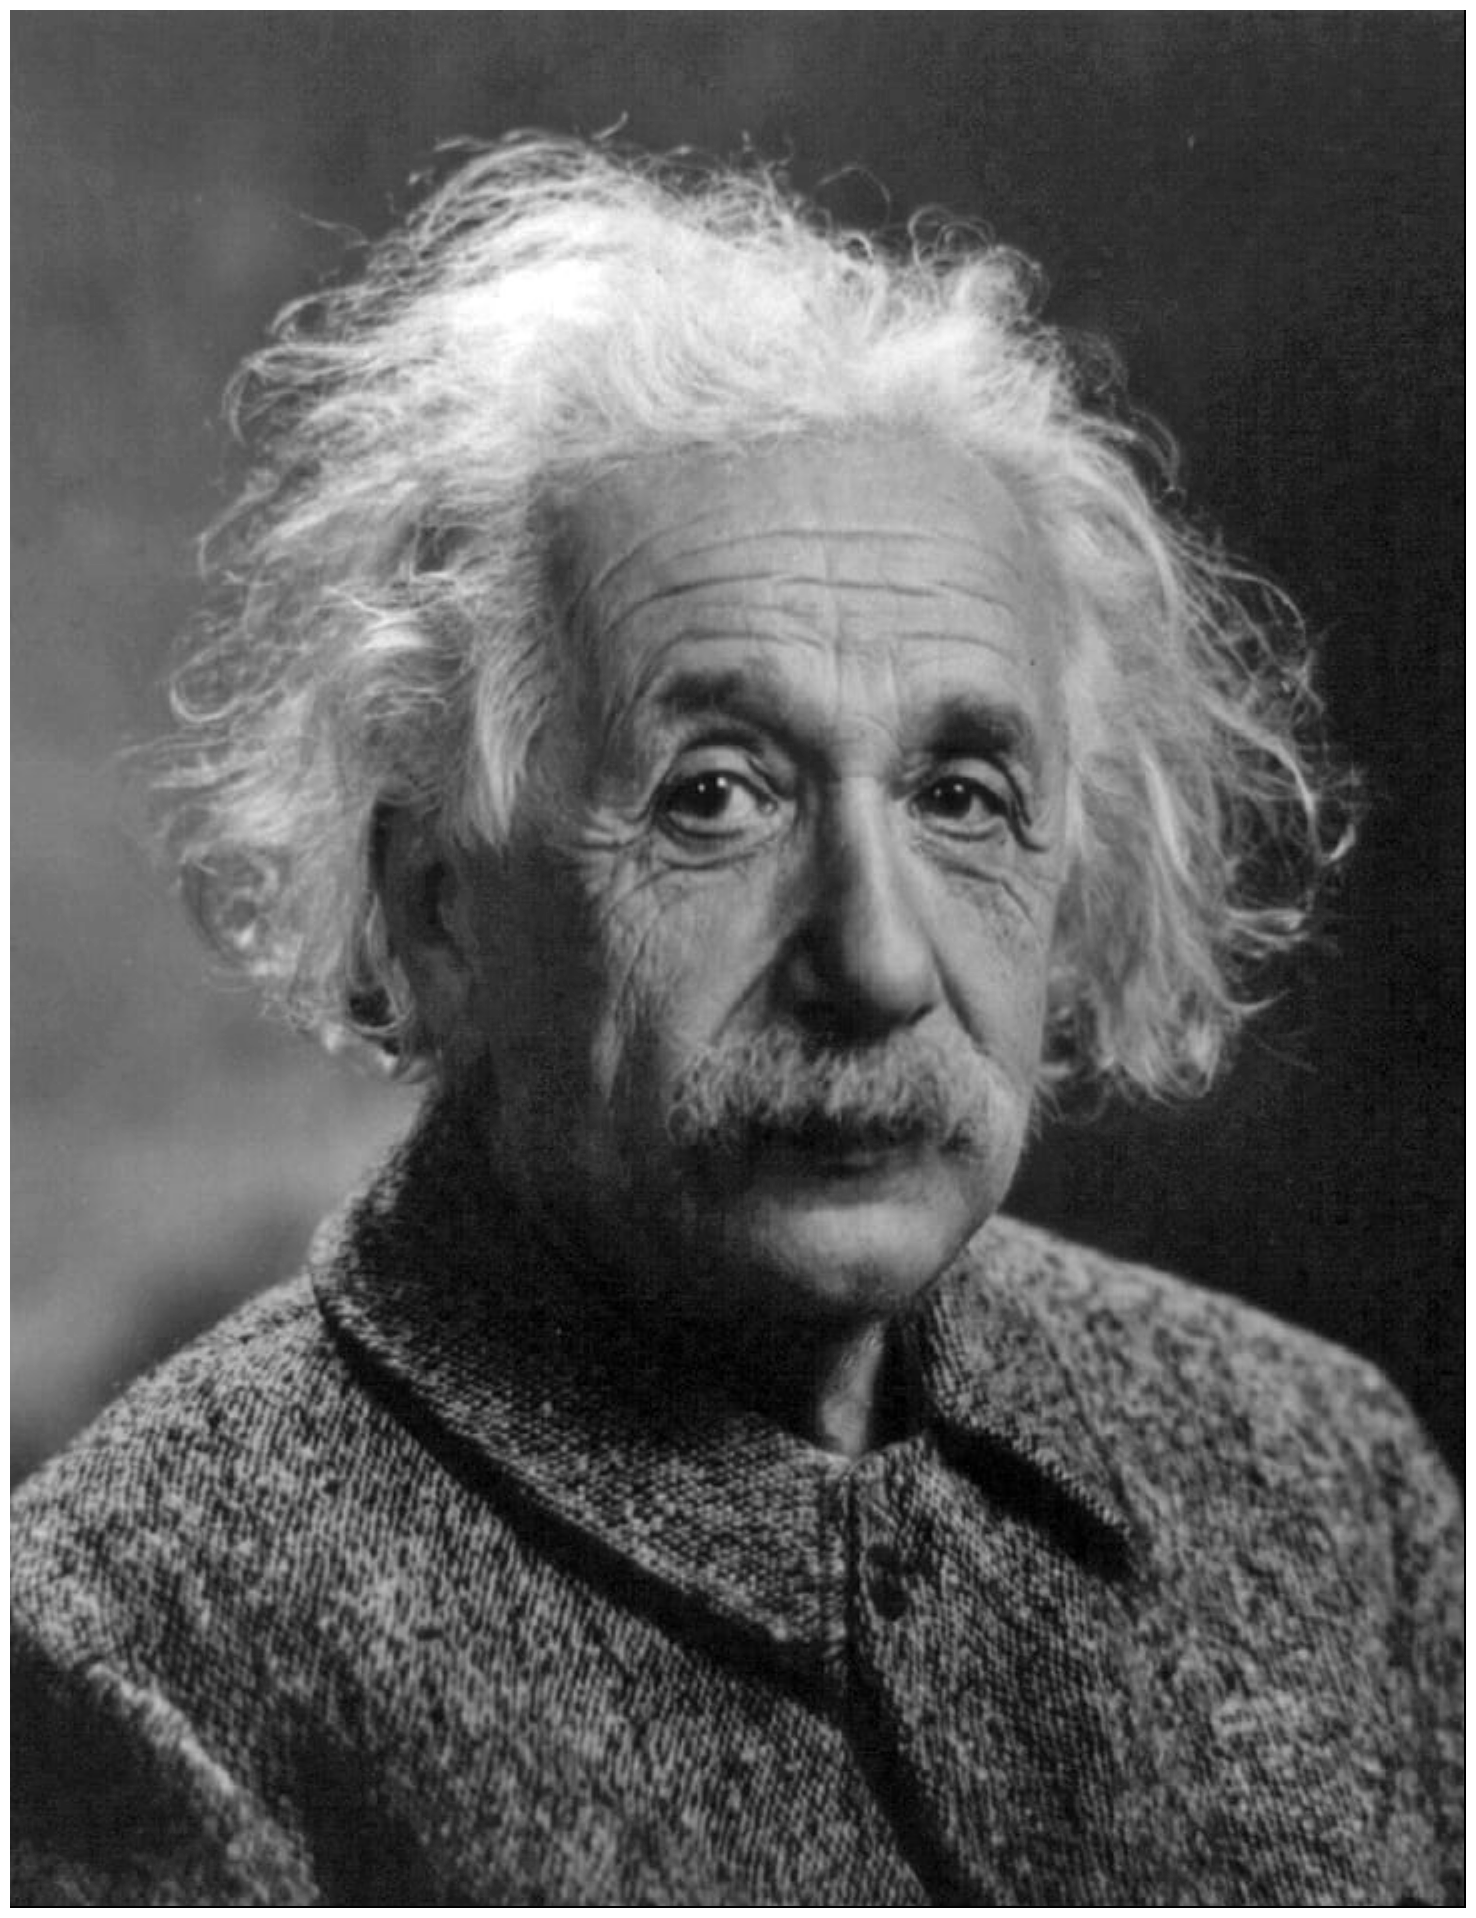

In [237]:
displayImageInActualSize(I3)

In [239]:
# creating the scaling matrix
def scaling_matrix(scale):
    size = len(scale)
    matrix = np.zeros((size,size))
    for i,_ in enumerate(matrix):
        matrix[i][i] = scale[i]
    return matrix
 # scaling the image
def scale_image(scale, I_grey):
    numRows = I_grey.shape[0]
    numCols = I_grey.shape[1]
    S = scaling_matrix(scale)
    print(S)
    # initialise resultant image with all zeros
    I5 = np.zeros((int(scale[0])*numRows, int(scale[1])*numCols), dtype = 'uint8')
    # compute inverse transformation
    Tinv = np.linalg.inv(S)
    # apply inverse on each pixel location in image
    for new_i in range(I5.shape[0]):
       for new_j in range(I5.shape[1]):
          p_dash = np.array([new_i,new_j])
          p = Tinv.dot(p_dash)
          # p = np.int16(np.round(p))
          i, j = p[0], p[1]
          if i < 0 or i >= numRows or j < 0 or j >= numCols:
              pass
          else:
              # apply interpolation on inverted pixels and get intensity g
              g = f_bilinearInterpolate(i,j,I_grey)
              # copy intensity g onto the original pixel locations
              I5[new_i,new_j] = g
    return I5

In [241]:
# giving scale value and source image
scale_image([2,2], I_grey)
displayImageInActualSize(I5)

[[2. 0.]
 [0. 2.]]


NameError: name 'I5' is not defined